# GETTING AND PREPARING THE DATA

In [1]:
import pandas as pd
df = pd.read_excel("moneycontrol_posts.xlsx")
df

,Messages,Sentiment
0,"RELIANCE Accumulate With Every DIPS, Rs.2400 S...",1.0
1,FUNDAMENTALY STORNG STOCK RELIANCE BUY THIS ST...,1.0
2,Telle grm Profit_Junction: Biocon is little bu...,1.0
3,"Selling started in global market, Nasdaq down ...",0.0
4,Us market green ..Monday reliance will boom ..,1.0
...,...,...
3133,2k21 has been so Unprecedented for Long term m...,NaN
3134,Currently trading at lower price due to indust...,NaN
3135,How to overcome our fear of losses incurred by...,NaN
3136,Disinvestment is on a high agenda and priority...,NaN


In [2]:
df.isnull().sum(axis = 0)

Messages        0
Sentiment    1011
dtype: int64

In [3]:
df.dropna(axis=0, inplace=True)

In [4]:
df

,Messages,Sentiment
0,"RELIANCE Accumulate With Every DIPS, Rs.2400 S...",1
1,FUNDAMENTALY STORNG STOCK RELIANCE BUY THIS ST...,1
2,Telle grm Profit_Junction: Biocon is little bu...,1
3,"Selling started in global market, Nasdaq down ...",0
4,Us market green ..Monday reliance will boom ..,1
...,...,...
3126,buy all dips Bajaj auto Hero Moto to outperfor...,1
3127,Bank stocks accessible at alluring valuation ....,1
3131,The buy & hold target of Bajaj Auto is 3760 fo...,1
3132,"This stock may give you 2x,3x return this year...",1


In [5]:
df.drop_duplicates(subset ="Messages",keep = False, inplace = True)

In [6]:
df["Sentiment"].value_counts()

1    587
0    246
Name: Sentiment, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["Messages"], df["Sentiment"], 
                                                    shuffle=True, 
                                                    random_state=42)
x_train

2696    Telle grm v.gd/soAhpd for trading ideas : Indu...
649     Tech stocks crashing across Globe. huge sell o...
1379    Bharti airtel going to touch 730 and then 740 ...
1249    with credit growth reviving this year , axis b...
2231    big big big short position trapped today or to...
                              ...                        
201     Taking advantage of overdue correction in IT s...
309     buy buy in SIP and add this in your portfolio ...
965     dont lose your hard earned money by gambling, ...
1389    SBI Looks strong on charts here, Buy and accum...
303     ........buy Infosys fut 1685-1660 cbsl 1650 ta...
Name: Messages, Length: 624, dtype: object

In [8]:
len(df)

833

# LOADING AND FINE TUNING THE MODEL

In [9]:
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np
import matplotlib.pyplot as plt

In [10]:
model = tf.keras.models.load_model("model2")

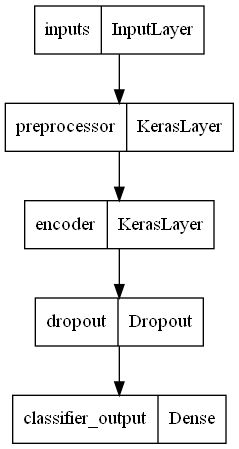

In [11]:
tf.keras.utils.plot_model(model)

In [12]:
model.compile(loss = "binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=["accuracy"])
history = model.fit(x_train, y_train,
                    batch_size=16, 
                    epochs=2)

Epoch 1/2
39/39 [==============================] - 26s 362ms/step - loss: 0.4459 - accuracy: 0.8141
Epoch 2/2
39/39 [==============================] - 14s 363ms/step - loss: 0.1931 - accuracy: 0.9407


# EVALUATING THE MODEL

In [14]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 3s 252ms/step - loss: 0.5020 - accuracy: 0.8134


[0.5019960403442383, 0.8133971095085144]

In [15]:
model.save("final_bert")

INFO:tensorflow:Assets written to: final_bert\assets


INFO:tensorflow:Assets written to: final_bert\assets
